In [1]:
from ase.io import read, write

In [2]:
train_configs = read("maceoff_1_with_multipoles_train.xyz", ":")

In [3]:
train_configs[0].arrays.keys()

dict_keys(['numbers', 'positions', 'formal_charges', 'mbis_multipoles', 'forces'])

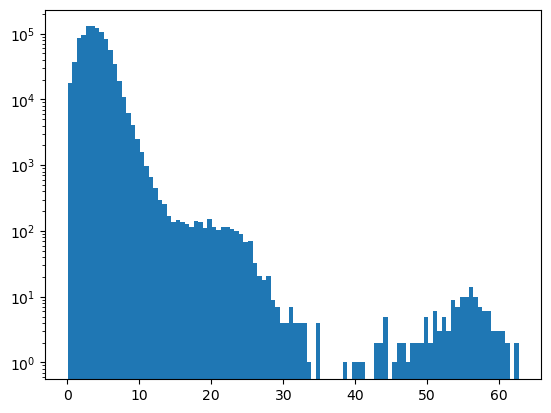

In [5]:
import numpy as np
import matplotlib.pyplot as plt
max_forces = [np.linalg.norm(c.arrays["forces"], axis=1).max(axis=0) for c in train_configs]


plt.yscale("log")
plt.hist(max_forces, bins=100)
plt.show()

In [11]:
bad_configs = [c for (c, f) in zip(train_configs, max_forces) if f > 15]
len(bad_configs)

2246

In [12]:
write("bad_configs.xyz", bad_configs)

In [13]:
good_configs = [c for (c, f) in zip(train_configs, max_forces) if f <= 15]
len(good_configs)

943200

In [14]:
write("maceoff_1_with_multipoles_train_force_filter_15.xyz", good_configs)

/opt/conda/envs/mace-openmm/lib/python3.11/site-packages/ase/io/extxyz.py:1000: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


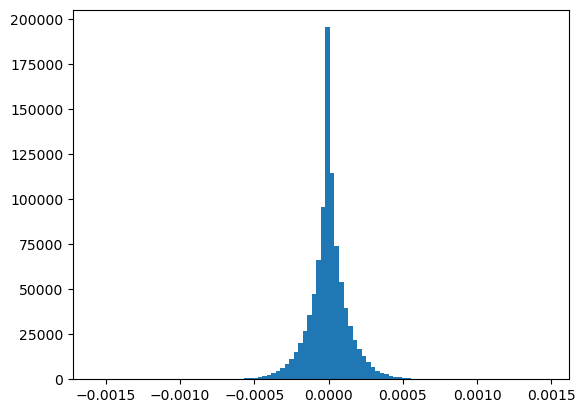

In [15]:
charges = [np.sum(c.arrays["mbis_multipoles"][:,0]) for c in good_configs]

plt.hist(charges, bins=100)
plt.show()